In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [3]:
df=pd.read_csv(r"C:\Users\rake0\Downloads\india_air_quality_data.csv")

In [4]:
# Set options to display full width
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', 1000)       # Adjusts the width of the display area

In [5]:
df

,City,State,Region,Latitude,Longitude,Datetime,Date,Year,Month,Day,Hour,Day_of_Week,Is_Weekend,AQI,AQI_Category,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,Temperature_C,Humidity_Percent,WindSpeed_mps,Precipitation_mm
0,Mumbai,Maharashtra,West,19.0760,72.8777,2024-08-26 01:30:00,2024-08-26,2024,8,26,1,0,0,1.0,Good,230.31,0.0,2.66,33.62,3.40,6.29,11.54,0.54,26.73,82,6.19,0.0
1,Mumbai,Maharashtra,West,19.0760,72.8777,2024-08-26 02:30:00,2024-08-26,2024,8,26,2,0,0,1.0,Good,233.65,0.0,2.59,32.90,3.46,6.44,11.94,0.51,26.73,82,6.19,0.0
2,Mumbai,Maharashtra,West,19.0760,72.8777,2024-08-26 03:30:00,2024-08-26,2024,8,26,3,0,0,1.0,Good,247.00,0.0,2.44,32.54,3.31,6.74,12.96,0.52,26.73,82,6.19,0.0
3,Mumbai,Maharashtra,West,19.0760,72.8777,2024-08-26 04:30:00,2024-08-26,2024,8,26,4,0,0,1.0,Good,263.69,0.0,2.59,32.19,3.55,7.31,14.65,0.60,26.73,82,6.19,0.0
4,Mumbai,Maharashtra,West,19.0760,72.8777,2024-08-26 05:30:00,2024-08-26,2024,8,26,5,0,0,1.0,Good,280.38,0.0,2.87,32.54,3.81,7.73,16.01,0.68,26.73,82,6.19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849595,Kavaratti,Lakshadweep,South,10.5618,72.6369,2025-08-25 20:30:00,2025-08-25,2025,8,25,20,0,0,1.0,Good,78.91,0.0,0.19,40.73,0.24,1.59,5.98,0.00,27.31,77,5.41,0.0
849596,Kavaratti,Lakshadweep,South,10.5618,72.6369,2025-08-25 21:30:00,2025-08-25,2025,8,25,21,0,0,1.0,Good,78.98,0.0,0.19,41.25,0.24,1.59,5.68,0.00,27.31,77,5.41,0.0
849597,Kavaratti,Lakshadweep,South,10.5618,72.6369,2025-08-25 22:30:00,2025-08-25,2025,8,25,22,0,0,1.0,Good,78.71,0.0,0.20,41.89,0.25,1.61,5.42,0.00,27.31,77,5.41,0.0
849598,Kavaratti,Lakshadweep,South,10.5618,72.6369,2025-08-25 23:30:00,2025-08-25,2025,8,25,23,0,0,1.0,Good,78.00,0.0,0.22,42.80,0.26,1.59,5.17,0.00,27.31,77,5.41,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849600 entries, 0 to 849599
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   City              849600 non-null  object 
 1   State             849600 non-null  object 
 2   Region            849600 non-null  object 
 3   Latitude          849600 non-null  float64
 4   Longitude         849600 non-null  float64
 5   Datetime          849600 non-null  object 
 6   Date              849600 non-null  object 
 7   Year              849600 non-null  int64  
 8   Month             849600 non-null  int64  
 9   Day               849600 non-null  int64  
 10  Hour              849600 non-null  int64  
 11  Day_of_Week       849600 non-null  int64  
 12  Is_Weekend        849600 non-null  int64  
 13  AQI               849600 non-null  float64
 14  AQI_Category      849600 non-null  object 
 15  CO                849600 non-null  float64
 16  NO                84

In [7]:
df.describe()

,Latitude,Longitude,Year,Month,Day,Hour,Day_of_Week,Is_Weekend,AQI,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,Temperature_C,Humidity_Percent,WindSpeed_mps,Precipitation_mm
count,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000,849600.000000
mean,22.108218,79.422599,2024.641361,6.603814,15.836158,11.500000,3.000118,0.286017,3.105708,636.178363,1.759281,14.995494,63.659689,10.849984,60.147109,75.724062,10.502810,24.296500,87.420000,3.092500,0.228800
std,6.548416,5.770169,0.479601,3.460099,8.696715,6.922191,2.005496,0.451898,1.455667,758.795095,8.969513,21.865433,45.870974,20.141280,79.550380,93.015626,15.970292,3.289721,8.528991,1.631032,0.937945
min,8.524100,70.802200,2024.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,47.240000,0.000000,0.020000,0.000000,0.010000,0.000000,0.000000,0.000000,10.220000,60.000000,0.040000,0.000000
25%,17.680075,75.729350,2024.000000,4.000000,8.000000,5.750000,1.000000,0.000000,2.000000,236.990000,0.000000,3.170000,29.680000,1.710000,11.820000,16.480000,1.760000,23.112500,84.500000,1.687500,0.000000
50%,23.170500,77.650500,2025.000000,7.000000,16.000000,11.500000,3.000000,0.000000,3.000000,440.600000,0.050000,8.050000,52.930000,4.630000,35.070000,49.780000,5.130000,25.270000,89.500000,3.005000,0.000000
75%,26.863125,81.683775,2025.000000,10.000000,23.000000,17.250000,5.000000,1.000000,5.000000,741.000000,0.410000,17.820000,90.840000,10.750000,75.990000,97.760000,12.670000,26.242500,93.000000,4.520000,0.000000
max,34.152600,94.108600,2025.000000,12.000000,31.000000,23.000000,6.000000,1.000000,6.000000,20507.810000,411.270000,389.340000,743.870000,595.090000,1928.840000,2146.890000,421.520000,28.960000,100.000000,6.650000,6.480000


In [8]:
df = df.drop(df[df["AQI_Category"] == "Unknown"].index)

In [9]:
df.isna().sum()

City                0
State               0
Region              0
Latitude            0
Longitude           0
Datetime            0
Date                0
Year                0
Month               0
Day                 0
Hour                0
Day_of_Week         0
Is_Weekend          0
AQI                 0
AQI_Category        0
CO                  0
NO                  0
NO2                 0
O3                  0
SO2                 0
PM2.5               0
PM10                0
NH3                 0
Temperature_C       0
Humidity_Percent    0
WindSpeed_mps       0
Precipitation_mm    0
dtype: int64

In [10]:
df.shape

(849478, 27)

In [11]:
df[["AQI","AQI_Category"]].nunique()

AQI             5
AQI_Category    5
dtype: int64

In [12]:
df["AQI_Category"].unique()

array(['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'], dtype=object)

C:\Users\rake0\AppData\Local\Temp\ipykernel_24756\483990326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cities.values, y=top10_cities.index, palette="Reds_r")


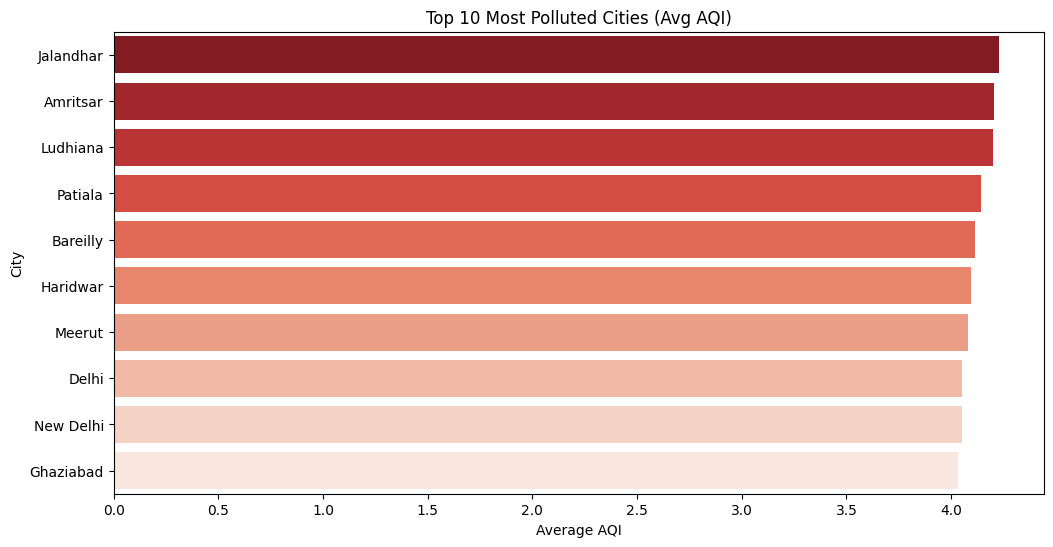

In [13]:
# Ensure datetime column is in correct format
df["Datetime"] = pd.to_datetime(df["Datetime"], errors="coerce")
plt.figure(figsize=(12,6))
top10_cities = df.groupby("City")["AQI"].mean().nlargest(10)
sns.barplot(x=top10_cities.values, y=top10_cities.index, palette="Reds_r")
plt.title("Top 10 Most Polluted Cities (Avg AQI)")
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.show()


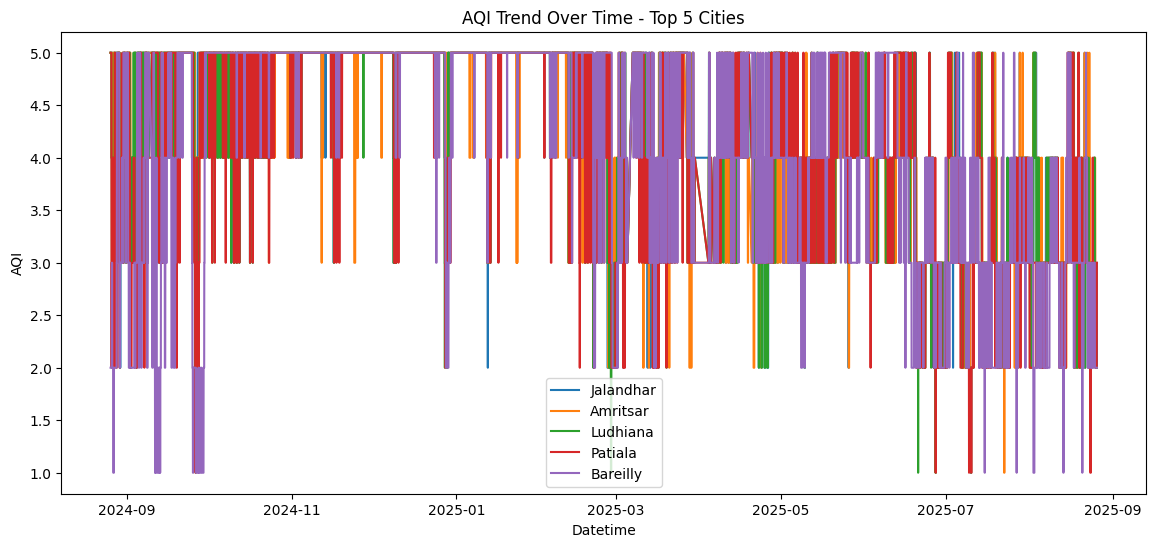

In [14]:
top5_cities = top10_cities.index[:5]
plt.figure(figsize=(14,6))
for c in top5_cities:
    city_data = df[df["City"] == c].groupby("Datetime")["AQI"].mean()
    plt.plot(city_data.index, city_data.values, label=c)
plt.title("AQI Trend Over Time - Top 5 Cities")
plt.xlabel("Datetime")
plt.ylabel("AQI")
plt.legend()
plt.show()

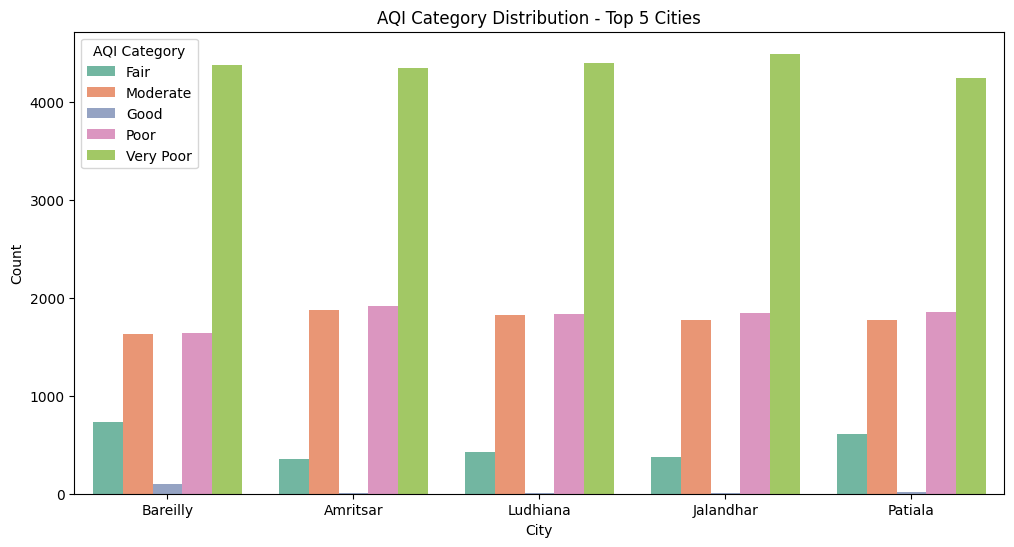

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df["City"].isin(top5_cities)], x="City", hue="AQI_Category", palette="Set2")
plt.title("AQI Category Distribution - Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="AQI Category")
plt.show()

C:\Users\rake0\AppData\Local\Temp\ipykernel_24756\1836630715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")


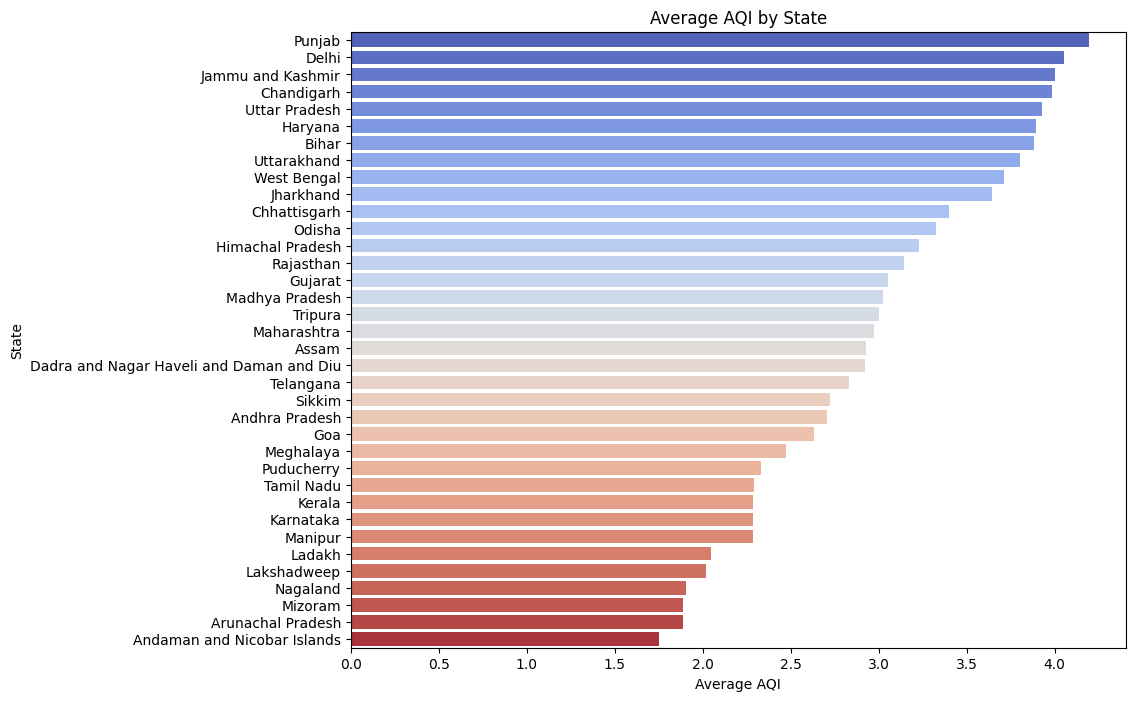

In [16]:
plt.figure(figsize=(10,8))
state_avg = df.groupby("State")["AQI"].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title("Average AQI by State")
plt.xlabel("Average AQI")
plt.ylabel("State")
plt.show()



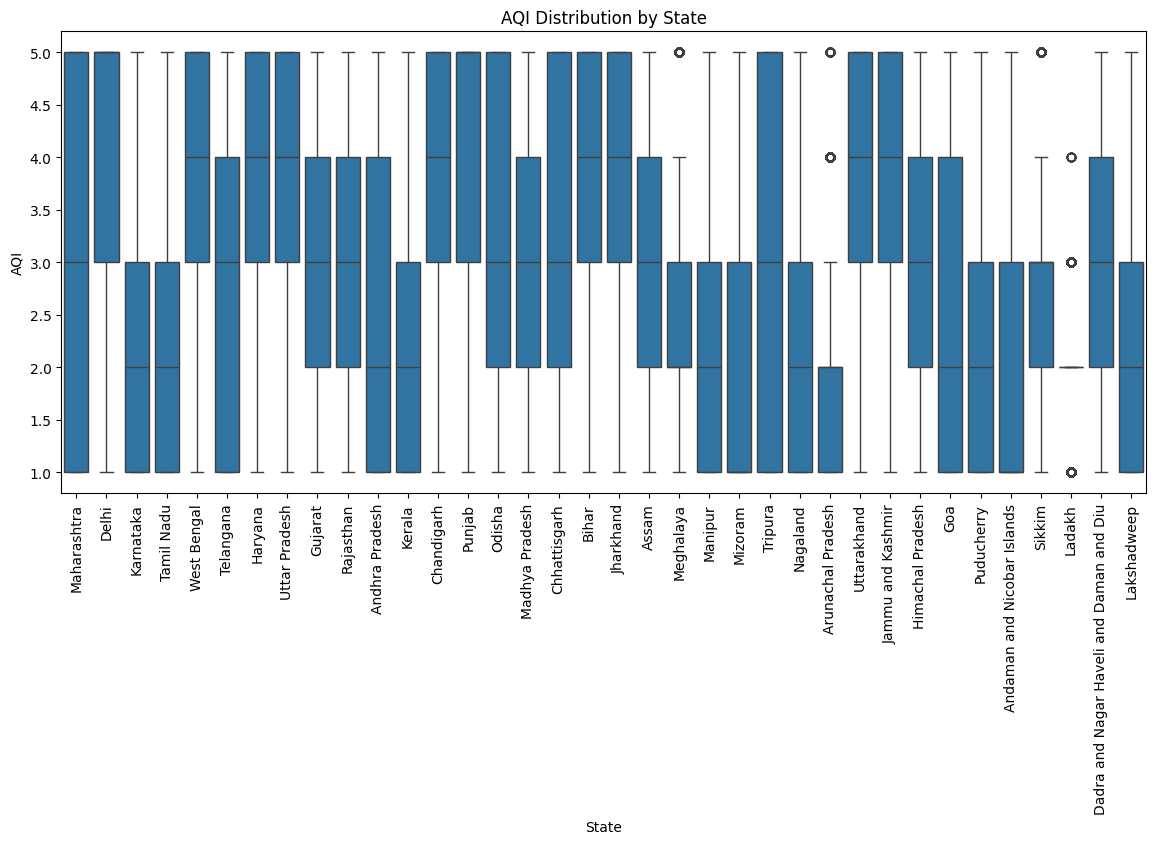

In [17]:
# 5. AQI Distribution by State (Boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="State", y="AQI")
plt.xticks(rotation=90)
plt.title("AQI Distribution by State")
plt.show()


C:\Users\rake0\AppData\Local\Temp\ipykernel_24756\2678988309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="AQI", palette="Set3")


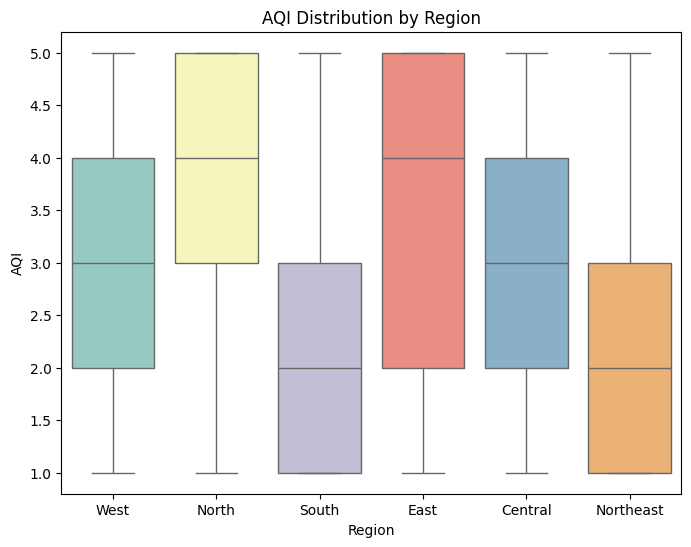

In [18]:
# 6. Boxplot of AQI by Region
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Region", y="AQI", palette="Set3")
plt.title("AQI Distribution by Region")
plt.show()

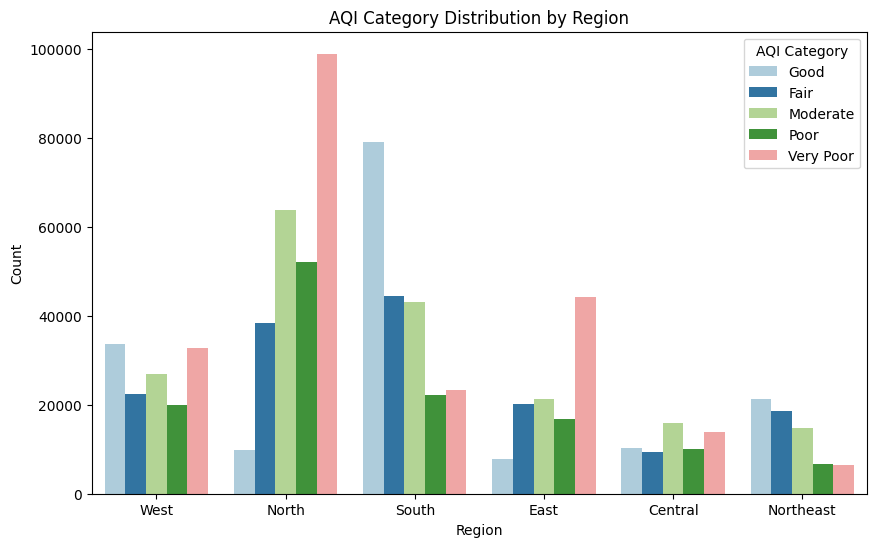

In [19]:
# 7. AQI Category Distribution by R
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Region", hue="AQI_Category", palette="Paired")
plt.title("AQI Category Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="AQI Category")
plt.show()

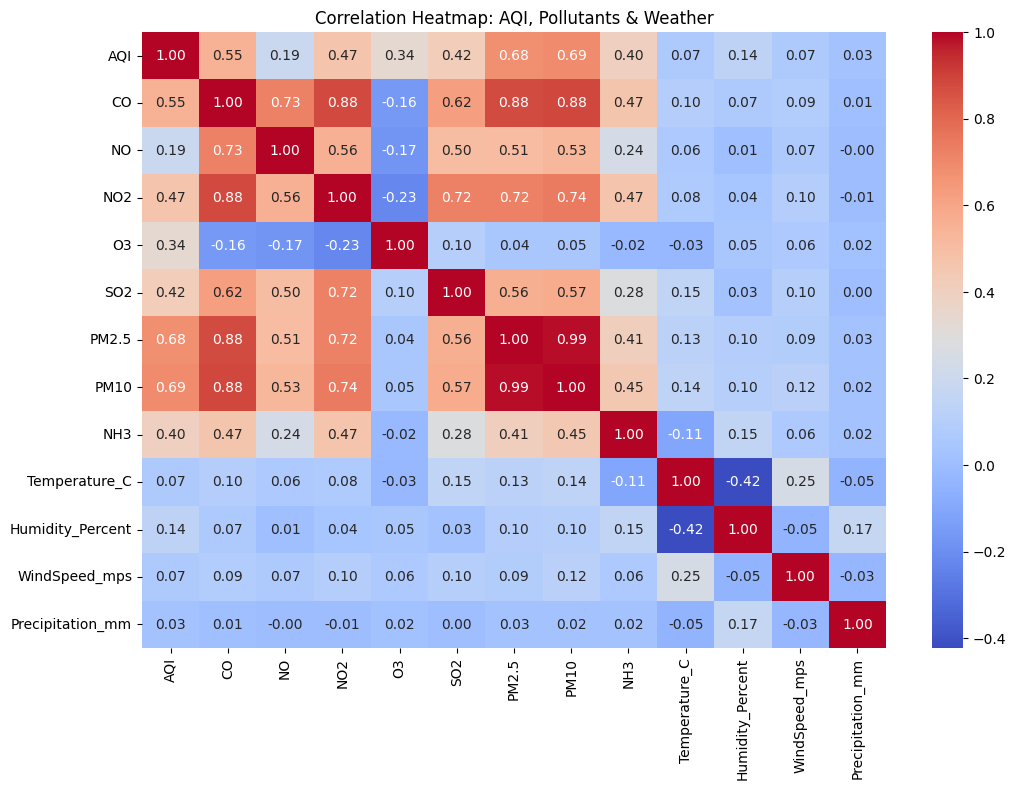

In [20]:
# 8. Correlation Heatmap (AQI vs Weather & Pollutants)
plt.figure(figsize=(12,8))
corr_cols = ["AQI","CO","NO","NO2","O3","SO2","PM2.5","PM10","NH3","Temperature_C","Humidity_Percent","WindSpeed_mps","Precipitation_mm"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: AQI, Pollutants & Weather")
plt.show()

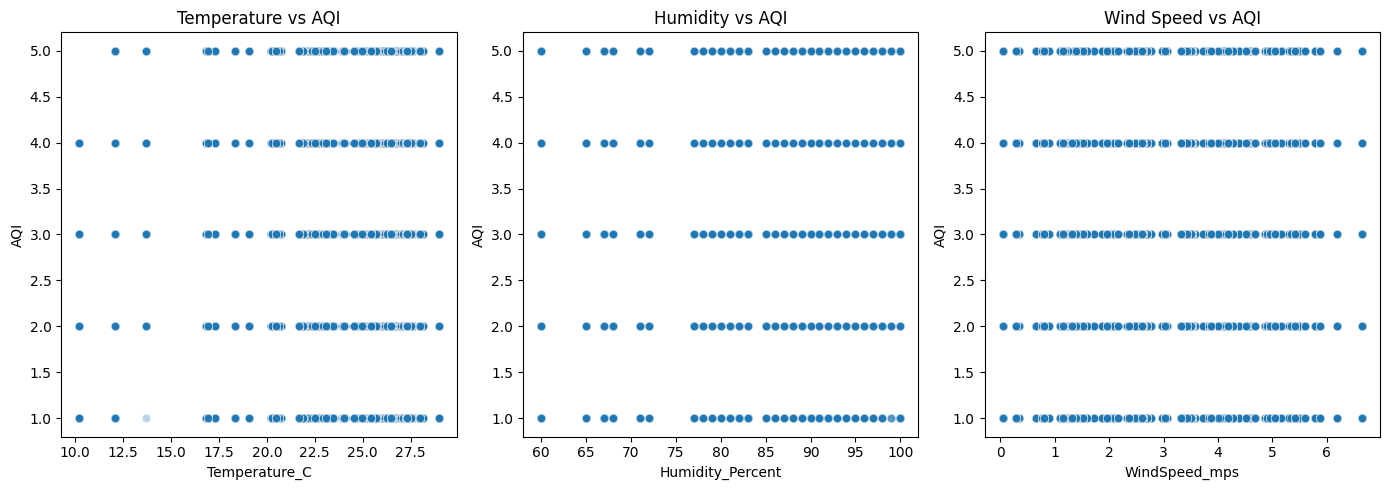

In [21]:

# 9. Scatter Plots: AQI vs Weather Factors
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(x="Temperature_C", y="AQI", data=df, alpha=0.3)
plt.title("Temperature vs AQI")

plt.subplot(1,3,2)
sns.scatterplot(x="Humidity_Percent", y="AQI", data=df, alpha=0.3)
plt.title("Humidity vs AQI")

plt.subplot(1,3,3)
sns.scatterplot(x="WindSpeed_mps", y="AQI", data=df, alpha=0.3)
plt.title("Wind Speed vs AQI")

plt.tight_layout()
plt.show()


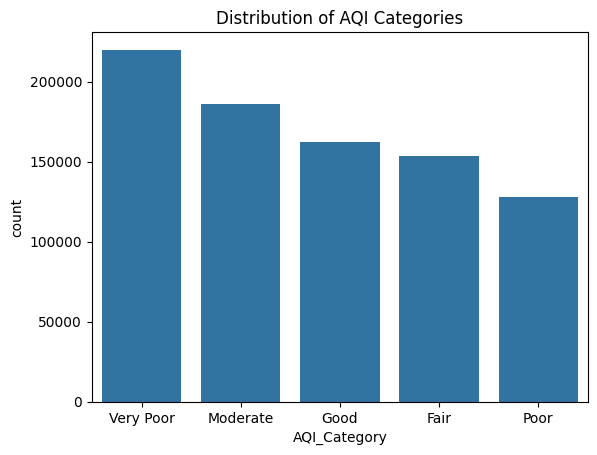

In [22]:
# Countplot for AQI Category
sns.countplot(x="AQI_Category", data=df, order=df["AQI_Category"].value_counts().index)
plt.title("Distribution of AQI Categories")
plt.show()


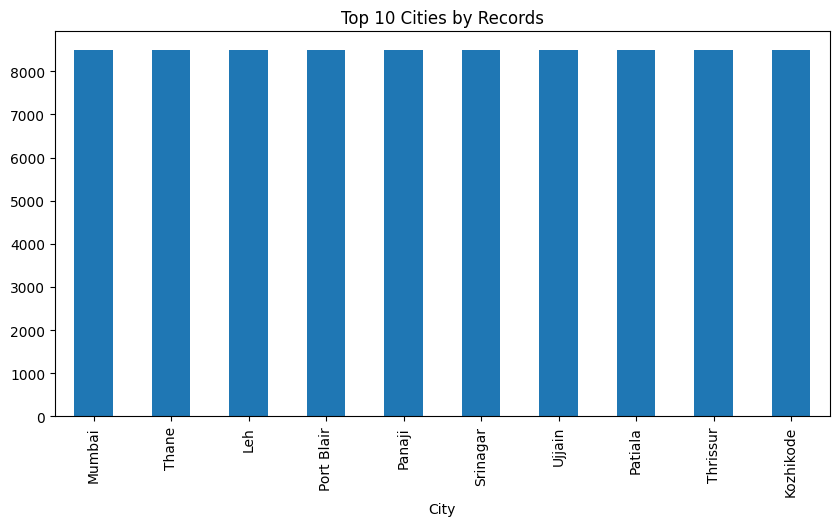

In [23]:
# Top 10 Cities with most records
df["City"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Cities by Records")
plt.show()

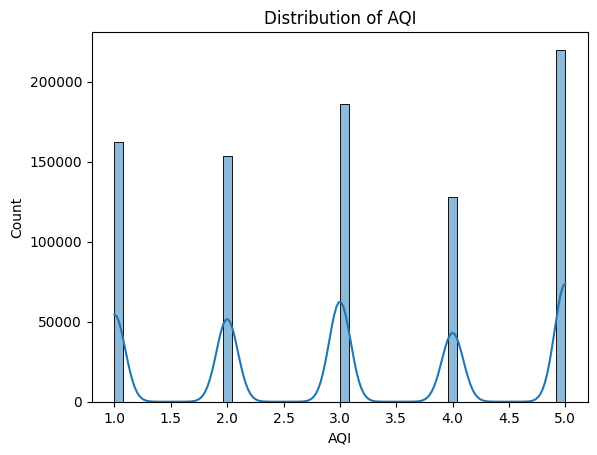

In [24]:
# Histogram of AQI
sns.histplot(df["AQI"], bins=50, kde=True)
plt.title("Distribution of AQI")
plt.show()

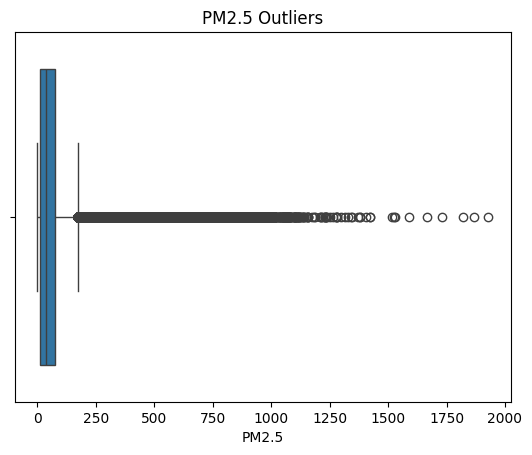

In [25]:
# Boxplot for PM2.5
sns.boxplot(x=df["PM2.5"])
plt.title("PM2.5 Outliers")
plt.show()

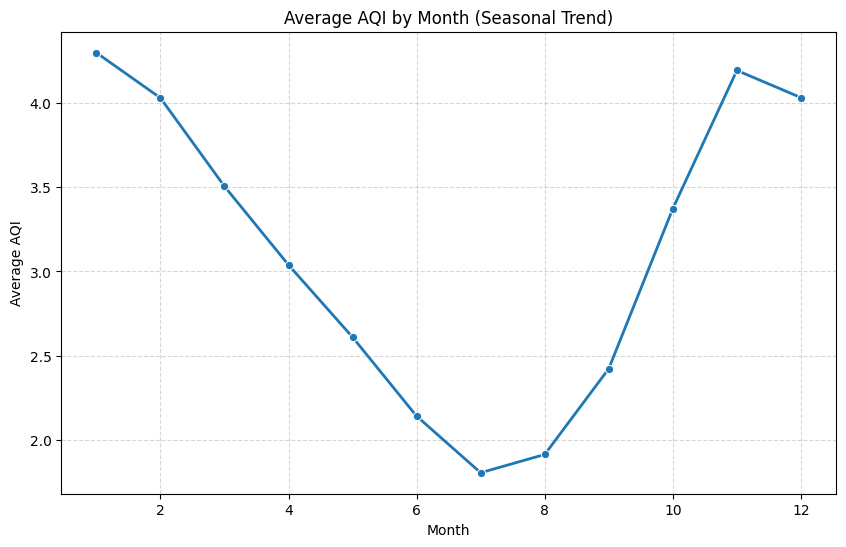

In [26]:
monthly_aqi = df.groupby("Month")["AQI"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_aqi, x="Month", y="AQI", marker="o", linewidth=2)
plt.title("Average AQI by Month (Seasonal Trend)")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

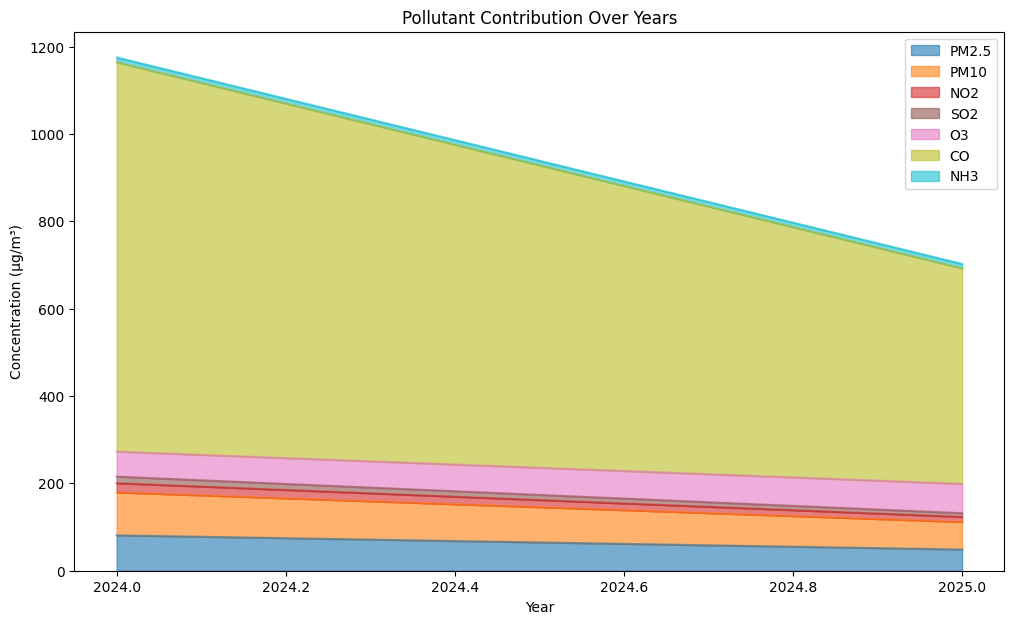

In [27]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "O3", "CO", "NH3"]

# Take mean pollutant levels by Year
pollutant_trends = df.groupby("Year")[pollutants].mean()

pollutant_trends.plot(kind="area", figsize=(12,7), alpha=0.6, cmap="tab10")
plt.title("Pollutant Contribution Over Years")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Year")
plt.show()


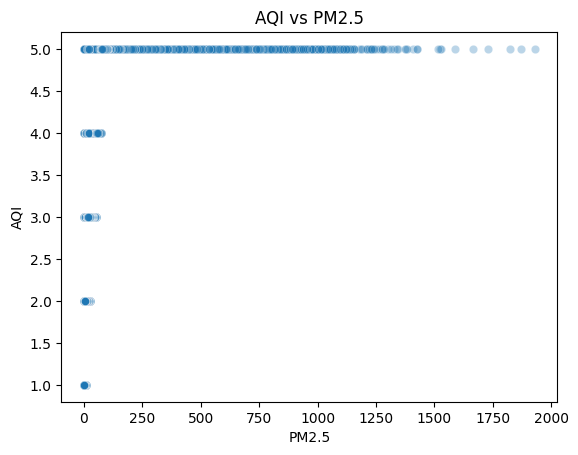

In [28]:
# Scatter: AQI vs PM2.5
sns.scatterplot(x="PM2.5", y="AQI", data=df, alpha=0.3)
plt.title("AQI vs PM2.5")
plt.show()


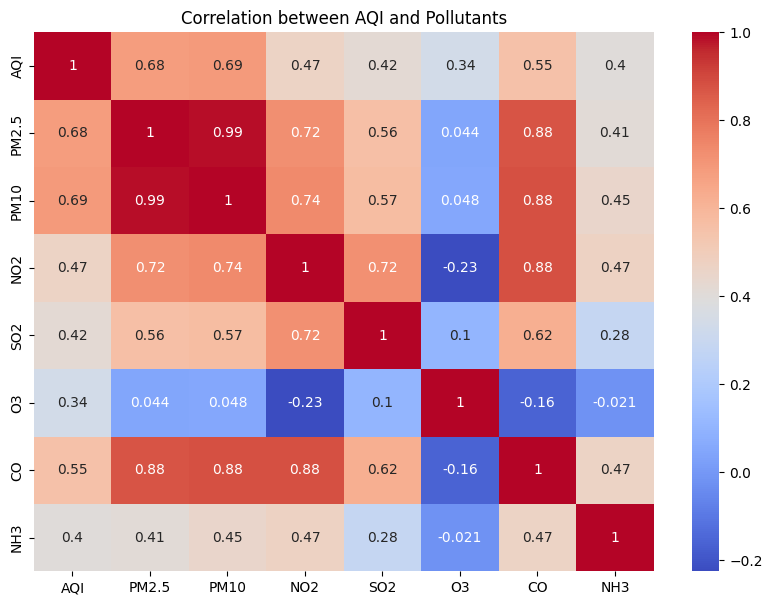

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[["AQI","PM2.5","PM10","NO2","SO2","O3","CO","NH3"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between AQI and Pollutants")
plt.show()

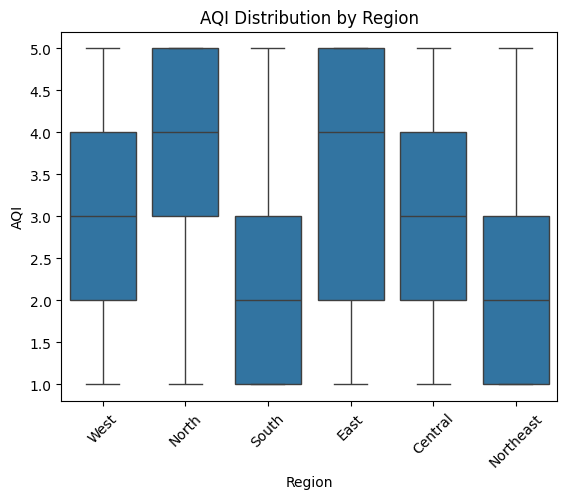

In [30]:
# Boxplot of AQI by Region
sns.boxplot(x="Region", y="AQI", data=df)
plt.title("AQI Distribution by Region")
plt.xticks(rotation=45)
plt.show()

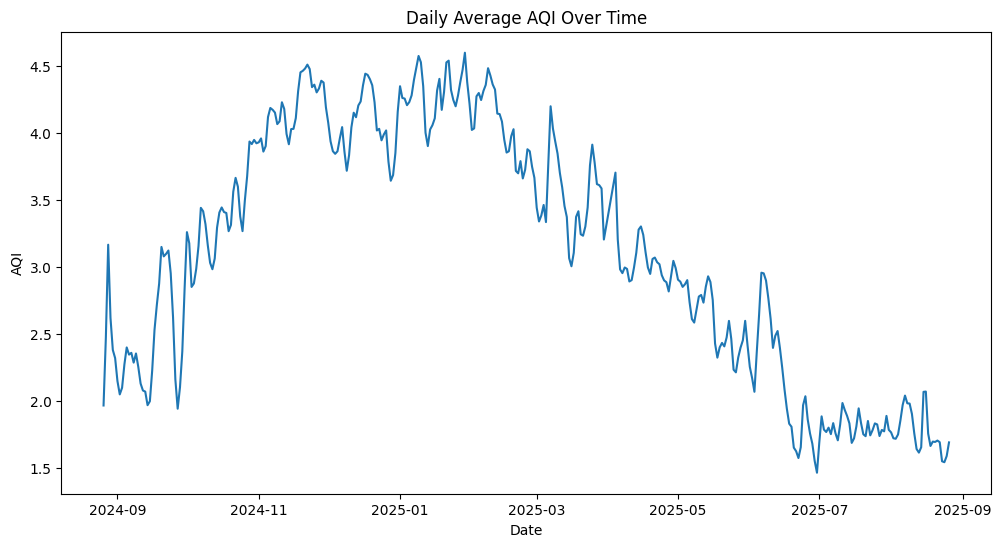

In [31]:
# AQI over time
df["Date"] = pd.to_datetime(df["Date"])
daily_aqi = df.groupby("Date")["AQI"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="AQI", data=daily_aqi)
plt.title("Daily Average AQI Over Time")
plt.show()


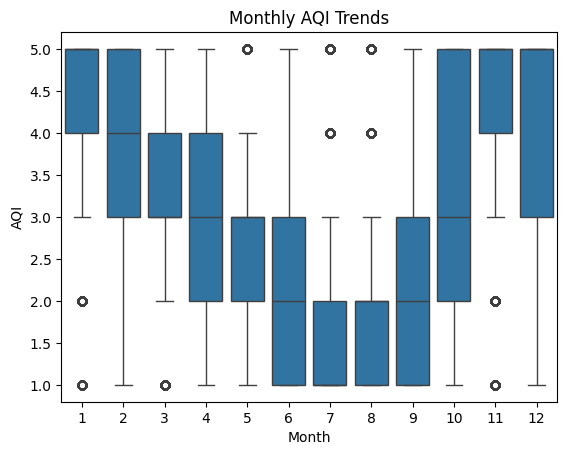

In [32]:
# Seasonal Trends: Month vs AQI
sns.boxplot(x="Month", y="AQI", data=df)
plt.title("Monthly AQI Trends")
plt.show()

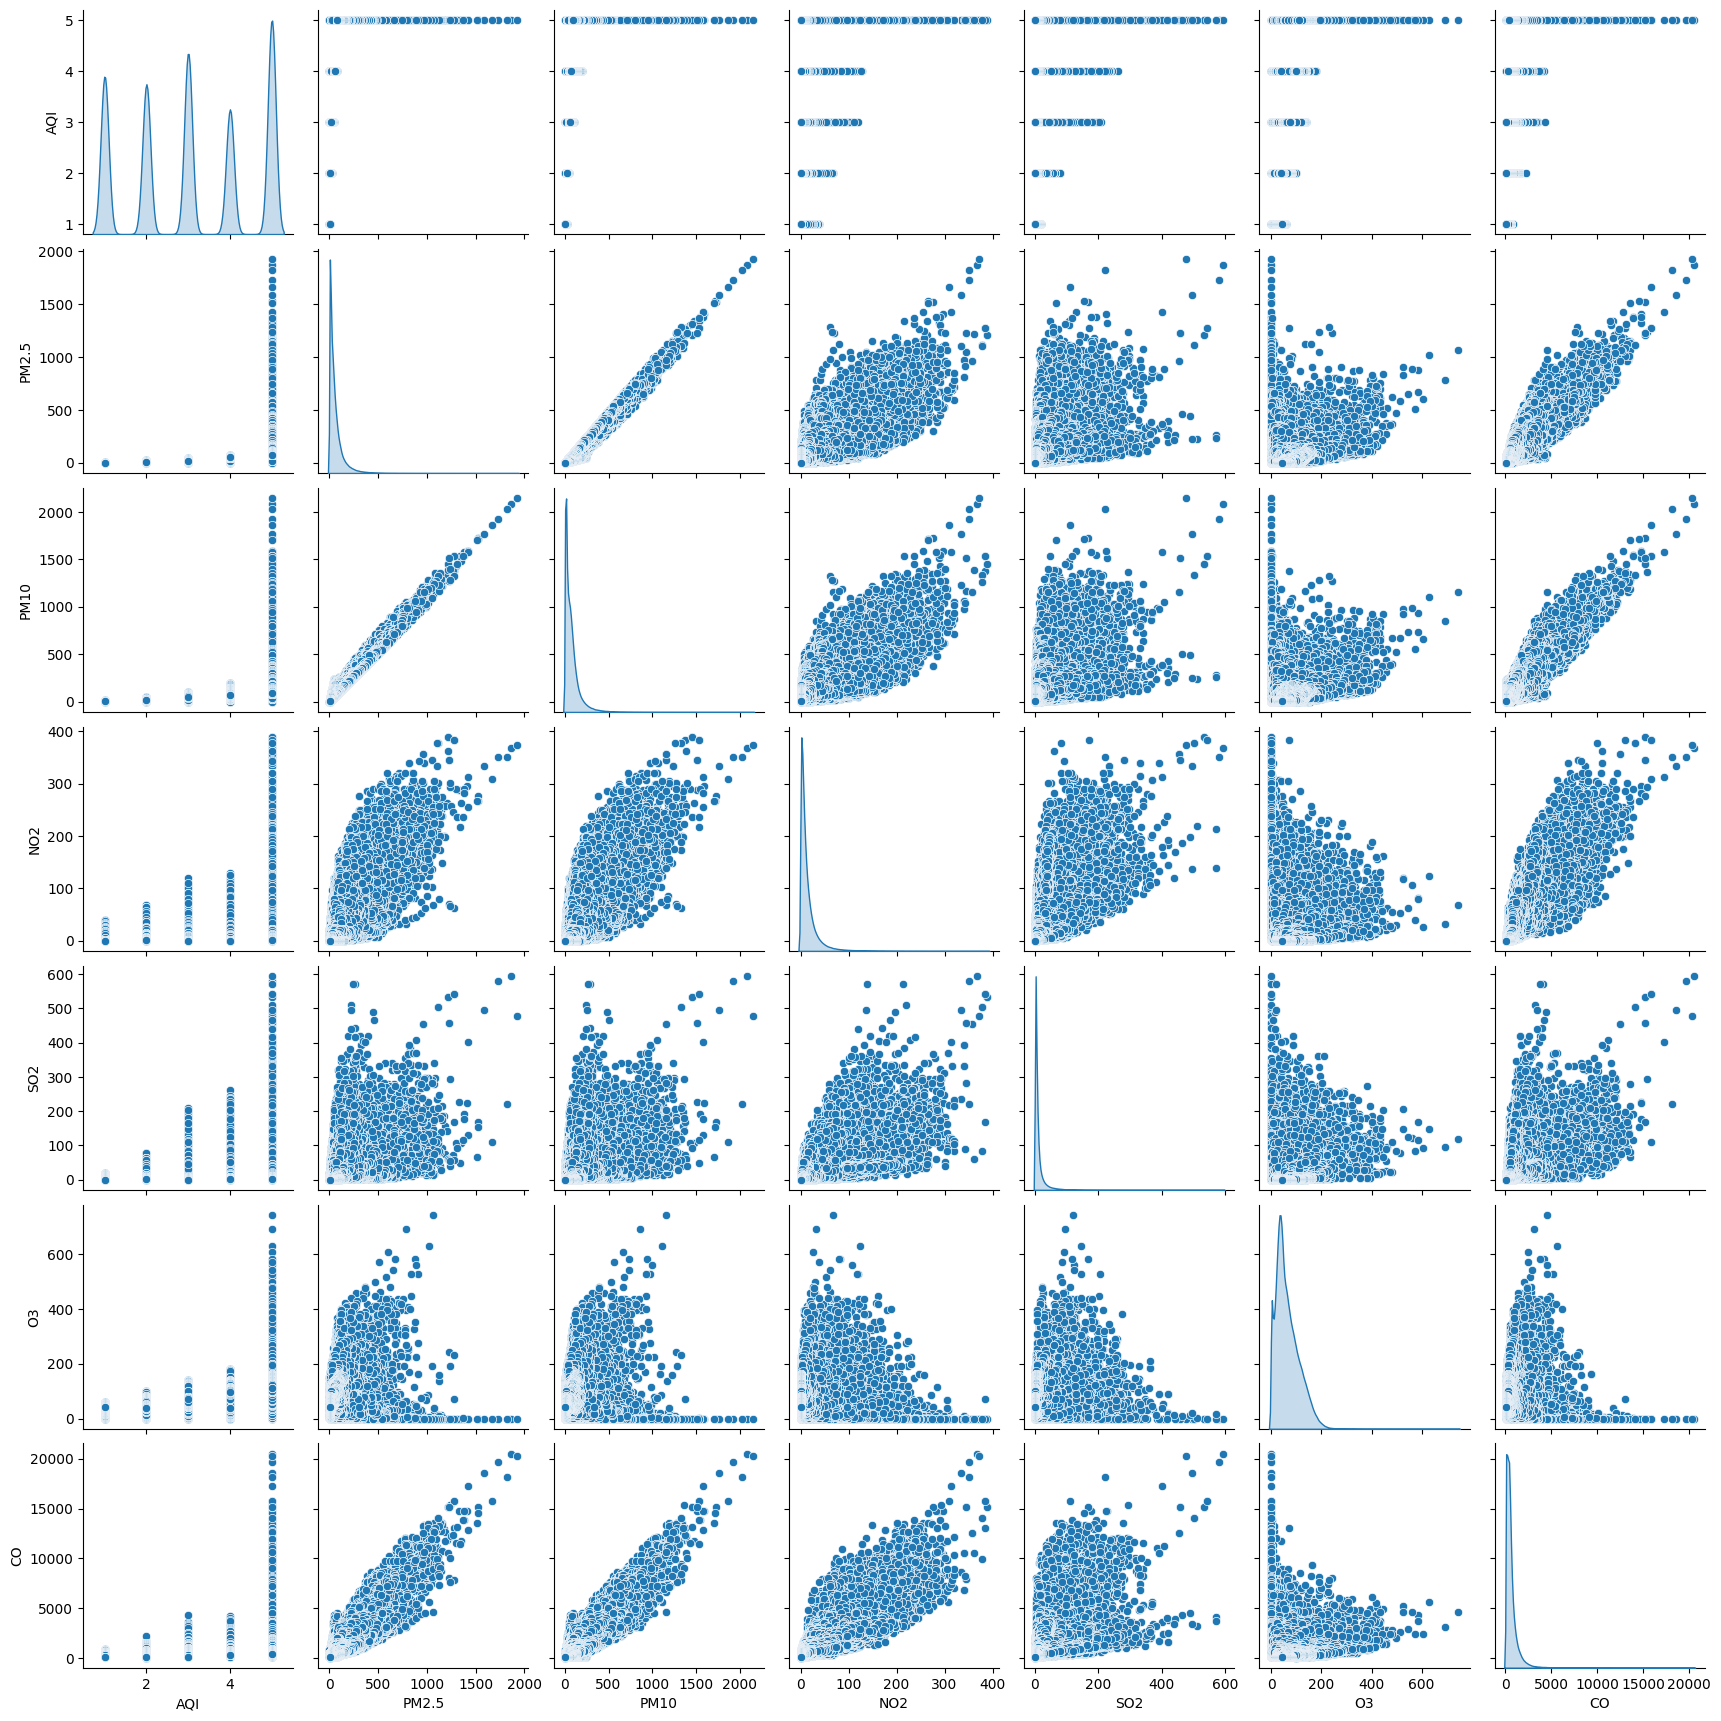

In [33]:
# Pairplot of pollutants and AQI
sns.pairplot(df[["AQI","PM2.5","PM10","NO2","SO2","O3","CO"]], diag_kind="kde")
plt.show()


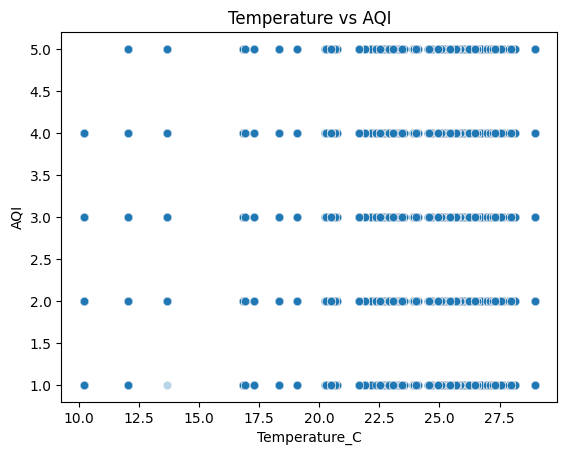

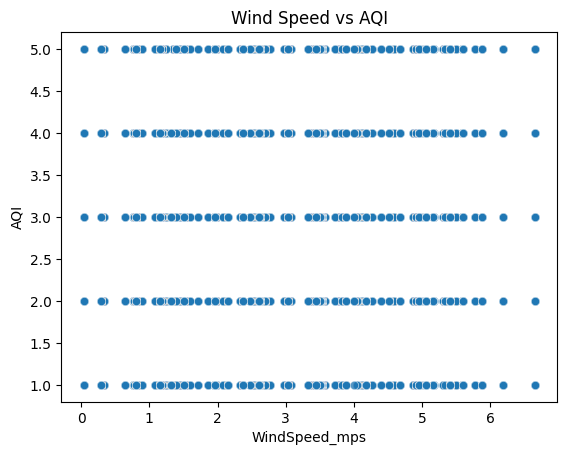

In [34]:
# Scatter: Temperature vs AQI
sns.scatterplot(x="Temperature_C", y="AQI", data=df, alpha=0.3)
plt.title("Temperature vs AQI")
plt.show()

# Wind Speed vs AQI
sns.scatterplot(x="WindSpeed_mps", y="AQI", data=df, alpha=0.3)
plt.title("Wind Speed vs AQI")
plt.show()


In [35]:
df.drop(["City","State","Year","Month","AQI","Latitude","Longitude","Datetime","Date","Day","Hour","Day_of_Week","Is_Weekend","Region"],axis=1,inplace=True)

In [36]:
df

,AQI_Category,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,Temperature_C,Humidity_Percent,WindSpeed_mps,Precipitation_mm
0,Good,230.31,0.0,2.66,33.62,3.40,6.29,11.54,0.54,26.73,82,6.19,0.0
1,Good,233.65,0.0,2.59,32.90,3.46,6.44,11.94,0.51,26.73,82,6.19,0.0
2,Good,247.00,0.0,2.44,32.54,3.31,6.74,12.96,0.52,26.73,82,6.19,0.0
3,Good,263.69,0.0,2.59,32.19,3.55,7.31,14.65,0.60,26.73,82,6.19,0.0
4,Good,280.38,0.0,2.87,32.54,3.81,7.73,16.01,0.68,26.73,82,6.19,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
849595,Good,78.91,0.0,0.19,40.73,0.24,1.59,5.98,0.00,27.31,77,5.41,0.0
849596,Good,78.98,0.0,0.19,41.25,0.24,1.59,5.68,0.00,27.31,77,5.41,0.0
849597,Good,78.71,0.0,0.20,41.89,0.25,1.61,5.42,0.00,27.31,77,5.41,0.0
849598,Good,78.00,0.0,0.22,42.80,0.26,1.59,5.17,0.00,27.31,77,5.41,0.0


In [37]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2"  

In [38]:
X =df.drop("AQI_Category",axis = 1)
y = df["AQI_Category"]

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=13)

In [40]:
X_train

,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,Temperature_C,Humidity_Percent,WindSpeed_mps,Precipitation_mm
750118,1375.20,0.02,53.47,33.62,12.40,73.75,89.46,38.00,13.68,90,1.16,0.00
812292,103.24,0.17,0.27,104.32,0.16,16.57,22.60,8.27,10.22,89,1.32,1.40
809523,165.22,0.00,1.39,75.10,0.42,1.28,4.58,0.63,10.22,89,1.32,1.40
26038,680.92,0.00,23.31,77.25,18.12,43.41,52.70,6.65,28.96,60,4.39,0.00
41127,281.65,0.27,11.30,40.62,2.95,14.27,16.47,6.14,26.70,88,1.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
689094,494.00,0.01,5.31,35.41,1.28,9.81,11.61,2.09,25.08,94,1.96,3.65
256778,1869.20,0.94,43.18,3.98,14.90,244.17,310.13,33.44,26.12,87,1.56,0.00
253492,134.59,0.00,4.88,44.66,5.59,6.93,9.64,6.49,27.57,82,3.03,0.00
702743,265.71,0.08,3.50,8.79,0.28,6.60,9.51,1.01,17.29,95,1.18,0.00


In [41]:
X_test

,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3,Temperature_C,Humidity_Percent,WindSpeed_mps,Precipitation_mm
575034,169.83,0.00,3.83,99.31,4.31,25.16,46.94,10.52,23.01,95,1.35,0.0
239903,1375.20,0.00,39.76,30.76,7.39,148.85,197.76,16.47,26.11,92,2.54,0.0
231933,974.66,0.00,22.62,87.26,14.90,88.66,107.79,20.52,26.25,94,3.52,0.0
747295,1035.81,6.59,20.64,11.46,4.52,82.68,135.10,5.79,21.66,92,3.44,0.0
741315,627.52,0.00,17.99,36.84,1.73,50.99,75.94,12.79,21.66,92,3.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
441493,77.97,0.01,0.27,37.47,0.39,1.91,4.18,0.00,25.28,89,5.16,0.0
543427,320.34,0.00,0.99,114.62,1.99,61.95,63.89,0.00,24.65,91,3.39,0.0
227869,112.56,0.14,0.78,74.96,0.56,9.62,12.52,5.64,24.10,93,4.51,0.0
261239,410.75,0.00,8.09,66.82,8.54,53.08,60.17,27.66,26.12,87,1.56,0.0


In [42]:
y_train

750118         Poor
812292     Moderate
809523         Fair
26038      Moderate
41127          Fair
            ...    
689094         Good
256778    Very Poor
253492         Good
702743         Good
491931    Very Poor
Name: AQI_Category, Length: 594634, dtype: object

In [43]:
y_test

575034     Moderate
239903    Very Poor
231933    Very Poor
747295    Very Poor
741315         Poor
            ...    
441493         Good
543427         Poor
227869         Fair
261239         Poor
174446         Poor
Name: AQI_Category, Length: 254844, dtype: object

In [44]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=13, n_jobs=-1)
model = rf.fit(X_train, y_train)

In [45]:
model

RandomForestClassifier(n_jobs=-1, random_state=13)

In [46]:
train_score = model.score(X_train, y_train)
print("Train_Score:", train_score)

Train_Score: 1.0


In [47]:
y_pred = model.predict(X_test)

In [48]:
test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Test Score: 0.9997292461270424


In [49]:
test_acc = model.score(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Test Accuracy: 0.9997292461270424


In [50]:
import joblib

joblib.dump(model, "air_quality_model.pkl")


['air_quality_model.pkl']

In [51]:
print("Train_Score:", train_score)
print("Test Score:", test_score)
print(f"Test Accuracy: {test_acc}")
print(f"Classification Report: \n{classification_report(y_pred, y_test)}")

Train_Score: 1.0
Test Score: 0.9997292461270424
Test Accuracy: 0.9997292461270424
Classification Report: 
              precision    recall  f1-score   support

        Fair       1.00      1.00      1.00     45925
        Good       1.00      1.00      1.00     48668
    Moderate       1.00      1.00      1.00     55996
        Poor       1.00      1.00      1.00     38150
   Very Poor       1.00      1.00      1.00     66105

    accuracy                           1.00    254844
   macro avg       1.00      1.00      1.00    254844
weighted avg       1.00      1.00      1.00    254844



In [52]:
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")

Confusion Matrix : 
[[45899    10     5     0     0]
 [   11 48655     0     0     0]
 [   11     0 55989     9     0]
 [    3     3     2 38132     5]
 [    1     0     0     9 66100]]
